In [1]:
#Importing the required libraries for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier




In [2]:

import zipfile
import os
import shutil

# Specify the file path for the zip archive
zip_file_path = "data.zip"

# Extract the contents of the zip file to a temporary directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("temp/")  # Extract all files to 'temp/' directory

# Check if the extracted folder contains the expected CSV file
extracted_files = os.listdir("temp/data")
if "train.csv" in extracted_files:
    csv_file_path = os.path.join("temp/data", "train.csv")
    df = pd.read_csv(csv_file_path)
    print(df.head())  # Display the DataFrame
else:
    print("Error: 'train.csv' not found in the extracted folder.")

# Clean up: Remove the temporary directory and its contents
shutil.rmtree("temp")


       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     C

/tmp/ipykernel_22211/2392905493.py:16: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


# Dataset at a glance 

In [3]:
df.head()



,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [5]:
#Checking for null values 
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [6]:
# checking for duplicate values 
df.duplicated().sum()   

0

In [7]:
#Data Types at a glance
df.dtypes


ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

# Removing columns that are not essential for analysis

In [8]:
df.drop(['ID','Name','SSN','Month'],axis=1,inplace=True)

# Addressing incosistencies 


In [9]:
wTypes = ['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit',
               'Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']

In [10]:
for col in wTypes:
    if df[col][df[col] == '_'].any():
        print(col)

Changed_Credit_Limit


In [11]:
df.loc[df.Changed_Credit_Limit == '_','Changed_Credit_Limit'] = np.nan

In [12]:
for col in wTypes:
    df[col] = df[col].str.replace('_','').astype('float64')

In [13]:
#Making sure all the columns are of the correct data types either categorical or numerical depending on the column
df.dtypes

Customer_ID                  object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

In [14]:
#Checking for values with _
columns_with_underscore = [col for col in df.columns if any("_" in str(value) for value in df[col])]
columns_with_underscore

['Customer_ID', 'Occupation', 'Credit_Mix', 'Payment_Behaviour']

In [15]:
#Cleaning data and removing _
def remove_underscore(col):
    df[col] = df[col].apply(lambda x: str(x).replace("_", "") if str(x) else x)
    df[col] = pd.to_numeric(df[col], errors="coerce")

remove_underscore("Age")
remove_underscore("Num_of_Delayed_Payment")
remove_underscore("Changed_Credit_Limit")
remove_underscore("Outstanding_Debt")
remove_underscore("Amount_invested_monthly")
remove_underscore("Monthly_Balance")

# Segregating numerical and categorical columns

In [16]:
# Numerical columns and categorical columns seperated based on the data types of the columns

numerical = df.select_dtypes(include=['float64','int64']).columns
print(numerical)

categorical = df.select_dtypes(include=['object']).columns
print(categorical)

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')
Index(['Customer_ID', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour',
       'Credit_Score'],
      dtype='object')


In [17]:
#Replacing missing values of age, annual_income, Occupation with mode for each customer ID

df.Age = df.groupby('Customer_ID').Age.transform(lambda x : x.mode()[0])
df.Annual_Income = df.groupby('Customer_ID').Annual_Income.transform(lambda x : x.mode()[0])
df.Occupation = df.groupby('Customer_ID').Occupation.transform(lambda x : x.mode()[0])

In [18]:
#Checking for outliers
def show_outliers(df, col, edge):
    fig, axs = plt.subplots(1, 2, figsize=(6, 6))
    sns.stripplot(y=col, data=df[df[col] < edge], ax=axs[0])
    axs[0].set_title(f"{col} < {edge}")
    sns.stripplot(y=col, data=df[df[col] > edge], ax=axs[1])
    axs[1].set_title(f"{col} > {edge}")
    plt.tight_layout()
    plt.show()

def outlier_one(data):
    show_outliers(data,"Age", 70)
    show_outliers(data,"Num_Bank_Accounts", 20)
    show_outliers(data,"Num_Credit_Card", 20)
    show_outliers(data,"Interest_Rate", 35)
    
def outlier_two(data):
    show_outliers(data,"Num_of_Loan", 20)
    show_outliers(data,"Num_of_Delayed_Payment", 30)
    show_outliers(data,"Num_Credit_Inquiries",30)
    show_outliers(data,"Monthly_Balance",1e-10)


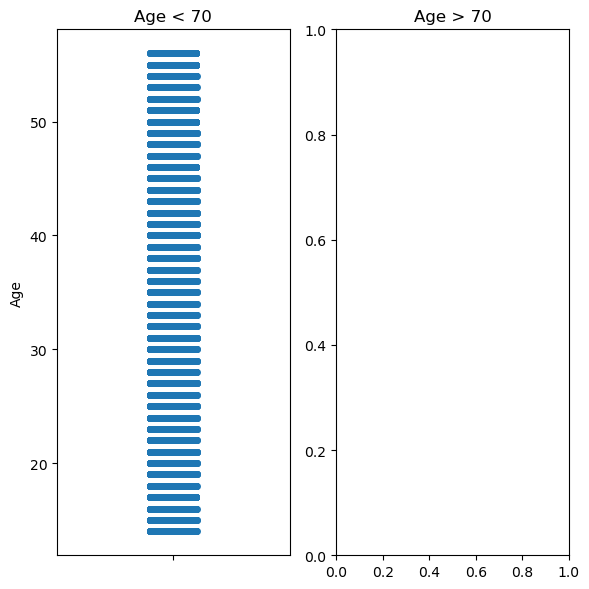

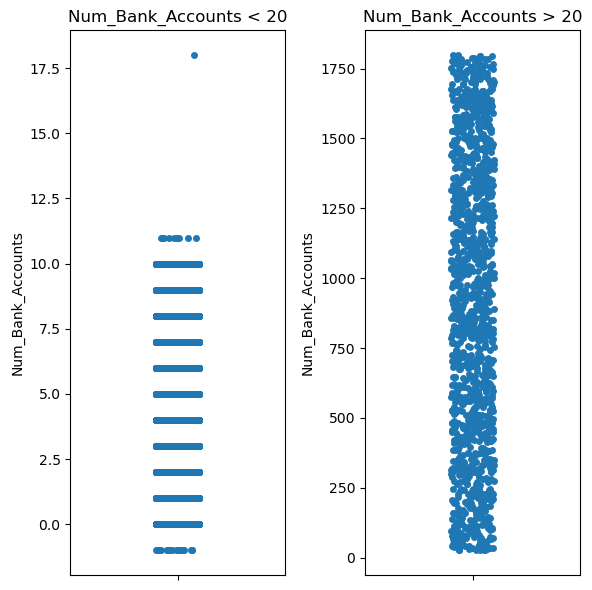

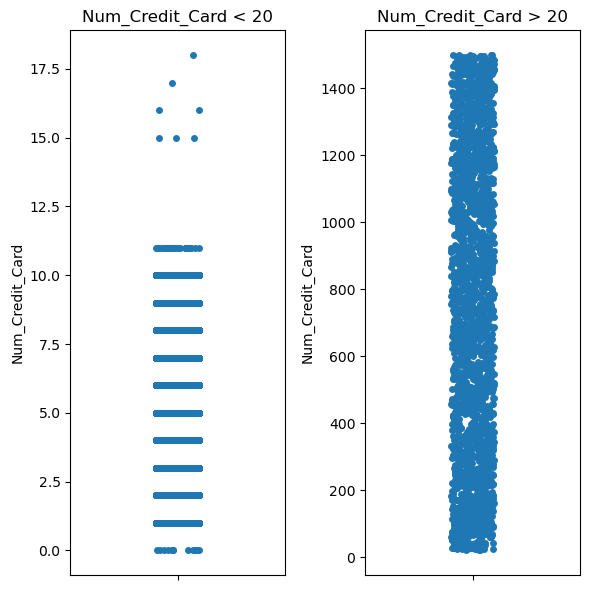

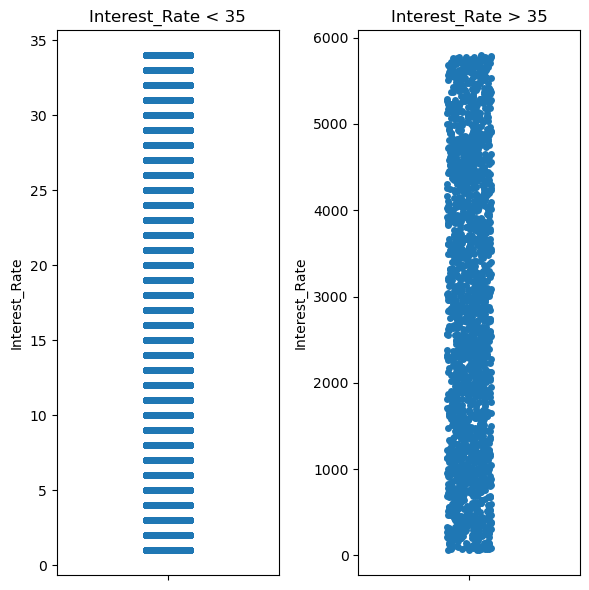

In [19]:
  
outlier_one(df)

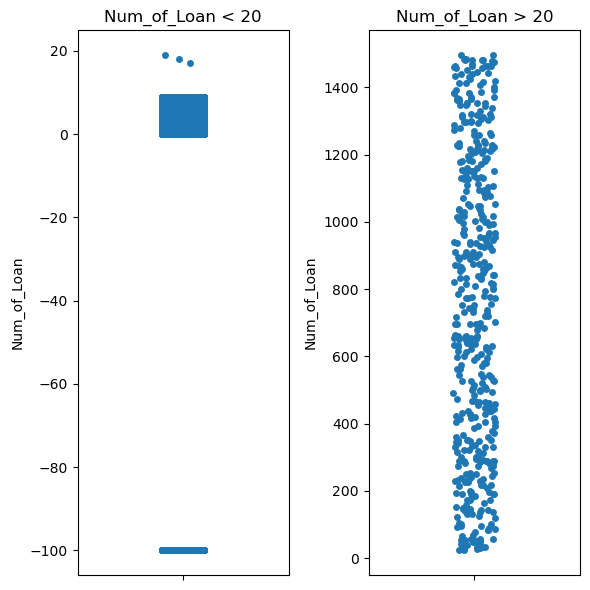

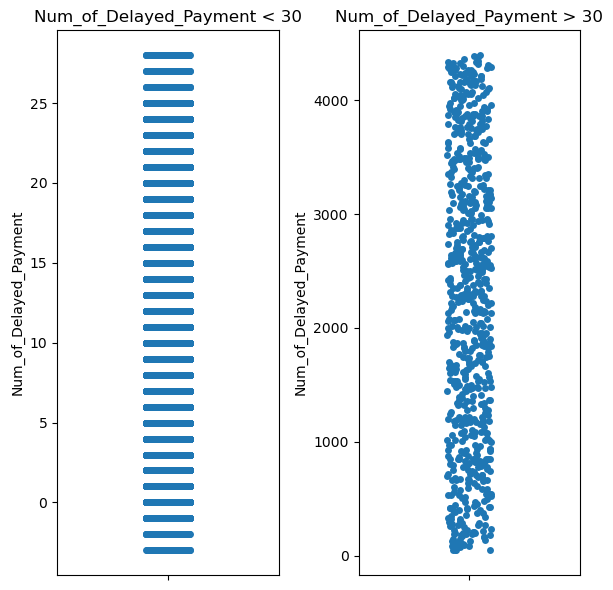

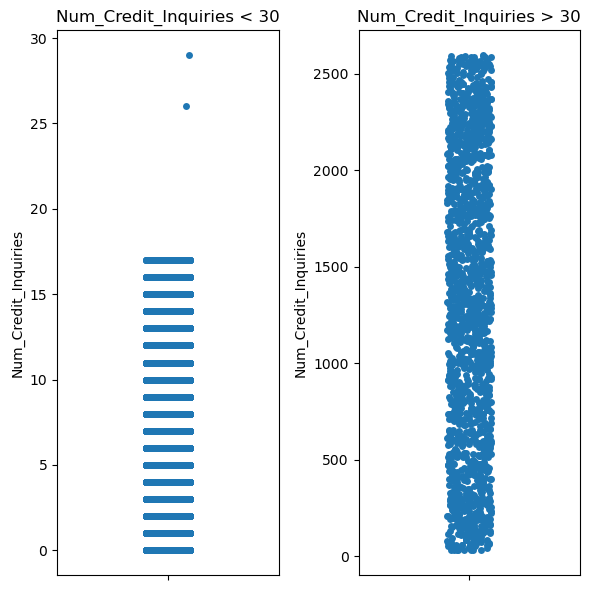

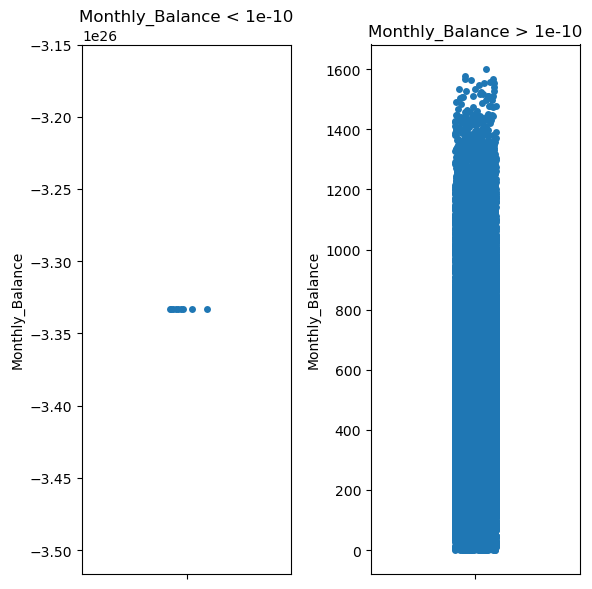

In [20]:
    
outlier_two(df)

In [21]:
#Checking for negative values 
for col in numerical:    
    if df[col][df[col] < 0].any():
        print(col,len(df[col][df[col] < 0]))


Num_Bank_Accounts 21
Num_of_Loan 3876
Delay_from_due_date 591
Num_of_Delayed_Payment 644
Changed_Credit_Limit 1586
Monthly_Balance 9


In [22]:
df.Num_Bank_Accounts[df.Num_Bank_Accounts < 0].value_counts()

Num_Bank_Accounts
-1    21
Name: count, dtype: int64

In [23]:
#Dropping the negative values 
df.drop(df[df.Num_Bank_Accounts < 0].index,inplace=True)

In [24]:
df.Num_of_Loan[df.Num_of_Loan<0].value_counts()

Num_of_Loan
-100.0    3875
Name: count, dtype: int64

In [25]:
#Dropping negative values
df.drop(df[df.Num_of_Loan < 0].index,inplace=True)

In [26]:
#Resetting index
df.reset_index(drop=True,inplace=True)

In [27]:
# Check for negative values in numerical columns
for col in numerical:
    # Check if any values in the column are negative
    if df[col][df[col] < 0].any():
        # Print the column name and the count of negative values
        print(col, len(df[col][df[col] < 0]))


Delay_from_due_date 559
Num_of_Delayed_Payment 616
Changed_Credit_Limit 1525
Monthly_Balance 9


In [28]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,96104.000000,96104.000000,81685.000000,96104.000000,96104.000000,96104.000000,96104.000000,96104.000000,89405.000000,94092.000000,94216.000000,96104.000000,96104.000000,96104.000000,91796.000000,9.334300e+04
mean,33.270707,50506.790217,4194.711239,17.096541,22.527606,72.354460,7.164832,21.072650,31.134489,10.394152,27.743090,1427.106101,32.288118,1409.238408,636.061659,-3.213953e+22
std,10.765046,38317.243974,3185.309650,117.309614,129.298964,466.483097,60.321139,14.861229,227.266979,6.795080,192.969963,1155.957167,5.114835,8324.403859,2040.035325,3.272959e+24
min,14.000000,7005.930000,303.645417,0.000000,0.000000,1.000000,0.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,24.000000,19337.160000,1625.188333,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.320000,3.000000,566.022500,28.060916,30.305498,74.549548,2.698778e+02
50%,33.000000,36993.940000,3091.386667,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.410000,6.000000,1166.640000,32.307331,69.246684,135.821176,3.364020e+02
75%,42.000000,71681.400000,5957.448333,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.890000,9.000000,1948.980000,36.500450,161.340704,265.579429,4.694649e+02
max,56.000000,179987.280000,15204.633333,1798.000000,1499.000000,5797.000000,1496.000000,67.000000,4397.000000,36.490000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


In [29]:


# Define columns to check for outliers
cols = [
    "Age",
    "Num_Bank_Accounts",
    "Num_Credit_Card",
    "Interest_Rate",
    "Num_of_Loan",
    "Num_of_Delayed_Payment",
    "Num_Credit_Inquiries",
    "Monthly_Balance",
]

# Iterating over each column
for col in cols:
    # Calculating the first quartile (Q1) and third quartile (Q3)
    q1, q3 = np.percentile(df[col], [25, 75])
    # Calculating the interquartile range (IQR)
    iqr = q3 - q1
    # Calculating lower and upper bounds for identifying outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    # Create a mask to identify outliers
    outliers_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    # Remove rows with outliers from the DataFrame
    df = df[~outliers_mask]

# Display descriptive statistics of the DataFrame after removing outliers
df.describe()


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,90331.000000,90331.000000,76765.000000,90331.000000,90331.000000,90331.000000,90331.000000,90331.00000,84012.000000,88446.000000,88573.000000,90331.000000,90331.000000,90331.000000,86286.000000,8.775100e+04
mean,33.274457,50533.207055,4198.177182,5.370504,5.531755,14.533051,3.535530,21.07405,31.011582,10.398299,27.873743,1427.159522,32.291563,1406.472035,636.558696,-3.418764e+22
std,10.773540,38331.727726,3186.911245,2.591486,2.068172,8.740160,2.447972,14.86387,227.035904,6.802643,193.518815,1156.572423,5.115721,8311.121823,2041.412217,3.375625e+24
min,14.000000,7005.930000,303.645417,0.000000,0.000000,1.000000,0.000000,-5.00000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,24.000000,19328.710000,1625.165833,3.000000,4.000000,7.000000,2.000000,10.00000,9.000000,5.320000,3.000000,565.230000,28.065458,30.319985,74.489724,2.700039e+02
50%,33.000000,37029.040000,3096.378333,5.000000,5.000000,13.000000,3.000000,18.00000,14.000000,9.410000,6.000000,1166.370000,32.304023,69.044950,135.662064,3.366183e+02
75%,42.000000,71716.560000,5967.748333,7.000000,7.000000,20.000000,5.000000,28.00000,18.000000,14.910000,9.000000,1948.980000,36.505678,161.193724,265.282425,4.696361e+02
max,56.000000,179987.280000,15204.633333,11.000000,11.000000,34.000000,9.000000,67.00000,4397.000000,36.490000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


In [30]:
df.reset_index(drop=True,inplace=True)

In [31]:
df.isnull().sum()    

Customer_ID                     0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       13566
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                10305
Delay_from_due_date             0
Num_of_Delayed_Payment       6319
Changed_Credit_Limit         1885
Num_Credit_Inquiries         1758
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8204
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4045
Payment_Behaviour               0
Monthly_Balance              2580
Credit_Score                    0
dtype: int64

# Imputing null values


In [32]:
# Define columns with numerical data containing null values
null_num_cols = ['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Amount_invested_monthly', 'Monthly_Balance']

# Initialize SimpleImputer with 'mean' strategy to fill missing values
imputer = SimpleImputer(strategy='mean')

# Impute missing values in numerical columns and create a new DataFrame
imputed_numerical = pd.DataFrame(imputer.fit_transform(df[null_num_cols]), columns=null_num_cols)

# Check for any remaining null values after imputation
imputed_numerical.isnull().sum()



Monthly_Inhand_Salary      0
Num_of_Delayed_Payment     0
Changed_Credit_Limit       0
Num_Credit_Inquiries       0
Amount_invested_monthly    0
Monthly_Balance            0
dtype: int64

In [33]:
df[null_num_cols] = imputed_numerical

In [34]:
df.isnull().sum()

Customer_ID                     0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                10305
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8204
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                    0
dtype: int64

# Dealing with inconsistencies in categorical values

In [35]:
df.Occupation.value_counts()

Occupation
Lawyer           6394
Engineer         6164
Mechanic         6157
Architect        6149
Scientist        6108
Accountant       6079
Teacher          6059
Developer        6055
Media_Manager    6034
Entrepreneur     5995
Journalist       5925
Doctor           5918
Manager          5780
Musician         5759
Writer           5747
_______             8
Name: count, dtype: int64

In [36]:
#Removing '_______'
df.loc[df.Occupation == '_______','Occupation'] = np.nan

In [37]:
df.Type_of_Loan.value_counts()

Type_of_Loan
Not Specified                                                                                                                              1268
Personal Loan                                                                                                                              1135
Student Loan                                                                                                                               1133
Debt Consolidation Loan                                                                                                                    1120
Credit-Builder Loan                                                                                                                        1120
                                                                                                                                           ... 
Home Equity Loan, Mortgage Loan, Home Equity Loan, Payday Loan, Home Equity Loan, Student Loan, Home Equity Loan, and Perso

In [38]:
#Checking different values in credit mix
df.Credit_Mix.value_counts() 

Credit_Mix
Standard    32894
Good        21927
_           18306
Bad         17204
Name: count, dtype: int64

In [39]:
#Removing '_'
df.loc[df.Credit_Mix == '_', 'Credit_Mix'] = np.nan

<Axes: ylabel='count'>

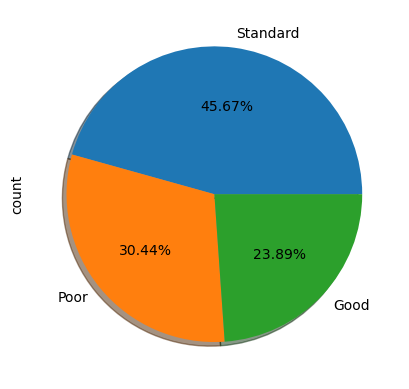

In [40]:
# Plot a countplot to visualize the distribution of values in the 'Credit_Mix' column
# sns.countplot(df.Credit_Mix)
df["Credit_Mix"].value_counts().plot.pie( autopct="%1.2f%%",shadow = True,labels = ["Standard","Poor","Good"])

In [41]:
#Checking different values in Credit_History_Age
df.Credit_History_Age.value_counts()

Credit_History_Age
17 Years and 9 Months    411
18 Years and 4 Months    403
15 Years and 9 Months    402
19 Years and 4 Months    401
19 Years and 5 Months    400
                        ... 
0 Years and 3 Months      19
33 Years and 7 Months     12
33 Years and 8 Months     12
0 Years and 2 Months      12
0 Years and 1 Months       2
Name: count, Length: 404, dtype: int64

In [42]:
#Checking different values in Payment_of_Min_Amount
df.Payment_of_Min_Amount.value_counts()

Payment_of_Min_Amount
Yes    47314
No     32197
NM     10820
Name: count, dtype: int64

In [43]:
#Removing 'NM'
df.loc[df.Payment_of_Min_Amount == 'NM','Payment_of_Min_Amount'] = np.nan

<Axes: xlabel='count', ylabel='Payment_of_Min_Amount'>

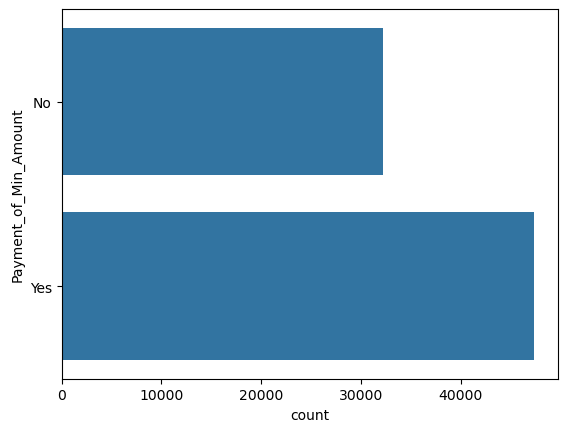

In [44]:
# Plot a countplot to visualize the distribution of values in the 'Payment_of_Min_Amount' column
sns.countplot(df.Payment_of_Min_Amount)

In [45]:
#Checking different values in Payment_Behaviour
df.Payment_Behaviour.value_counts()  

Payment_Behaviour
Low_spent_Small_value_payments      23030
High_spent_Medium_value_payments    15855
Low_spent_Medium_value_payments     12532
High_spent_Large_value_payments     12381
High_spent_Small_value_payments     10238
Low_spent_Large_value_payments       9441
!@9#%8                               6854
Name: count, dtype: int64

In [46]:
#Removing '!@9#%8'
df.loc[df.Payment_Behaviour == '!@9#%8','Payment_Behaviour'] = np.nan

<Axes: xlabel='count', ylabel='Payment_Behaviour'>

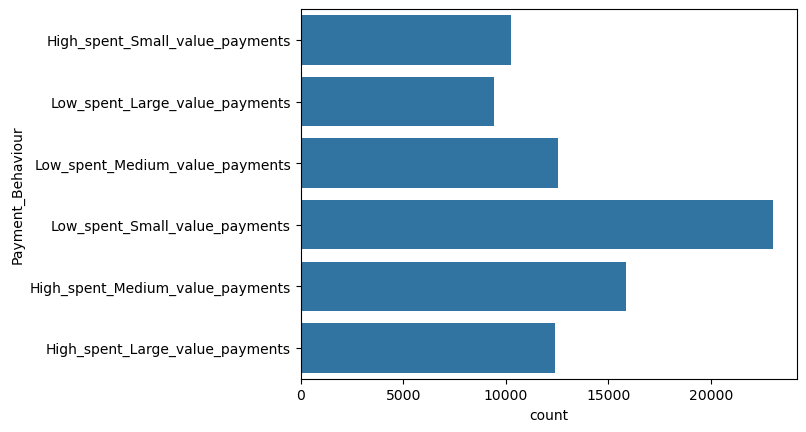

In [47]:
# Plot a countplot to visualize the distribution of values in the 'Payment_of_Min_Amount' column
sns.countplot(df.Payment_Behaviour)

In [48]:
df.Credit_Score.value_counts()

Credit_Score
Standard    48097
Poor        26241
Good        15993
Name: count, dtype: int64

In [49]:
#Dropping Customer ID as it wont be required for further analysis
df.drop(['Customer_ID'],axis=1,inplace=True)

In [50]:
categorical = categorical.drop('Customer_ID')
categorical = categorical.drop('Credit_Score')
categorical

Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Payment_Behaviour'],
      dtype='object')

In [51]:
#Imputing Values
imputer = SimpleImputer(strategy='most_frequent')
imputed_categorical = pd.DataFrame(imputer.fit_transform(df[categorical]),columns=categorical)

In [52]:
df[categorical] = imputed_categorical

In [53]:
df.shape

(90331, 23)

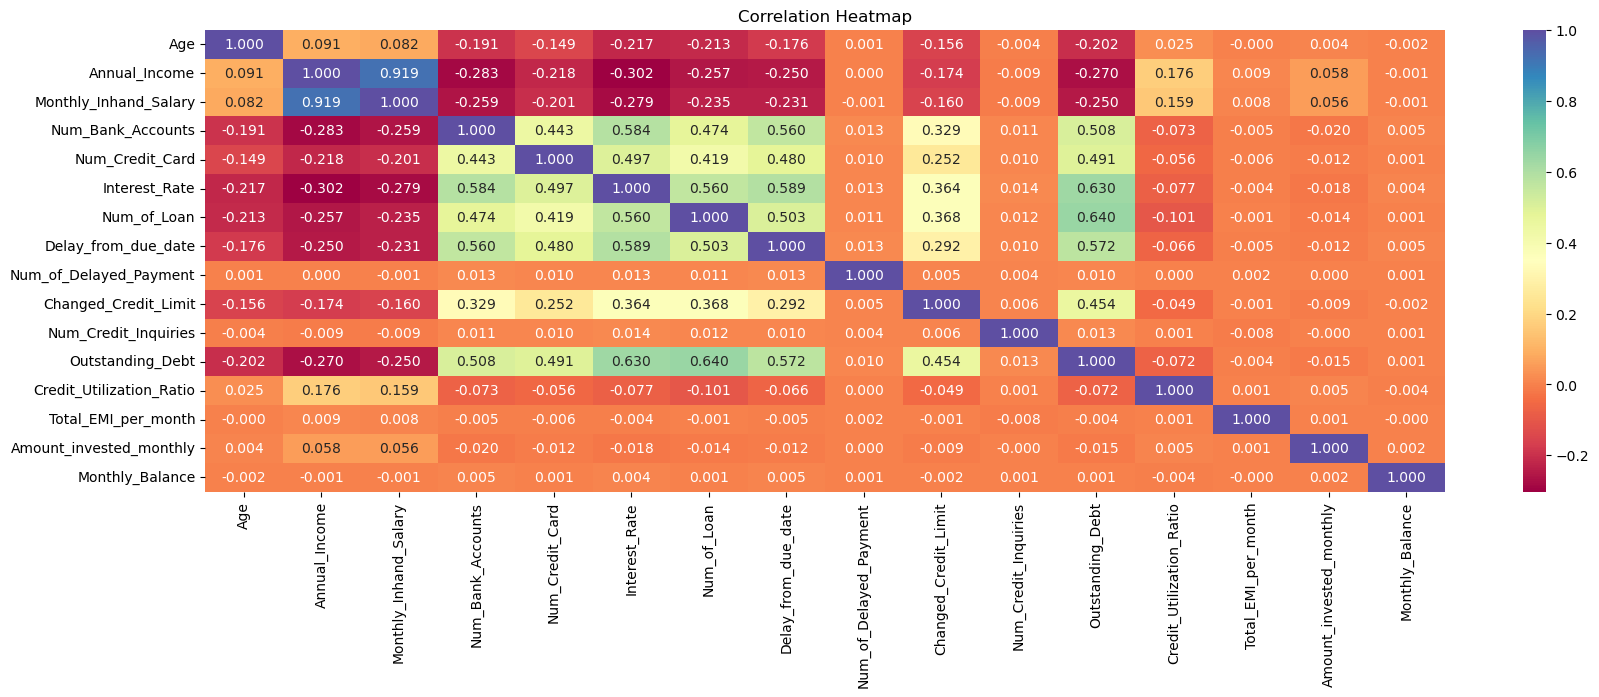

In [54]:


def show_heat_map(df):
    correlation_matrix = df[numerical].corr()
    plt.figure(figsize=(20, 6))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap="Spectral",
        fmt=".3f",
    )
    plt.title("Correlation Heatmap")

show_heat_map(df)

In [55]:
df.drop(['Monthly_Inhand_Salary'],axis=1,inplace=True)

In [56]:
numerical = numerical.drop('Monthly_Inhand_Salary')
numerical

Index(['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

# *Scaling and Encoding the features*

In [57]:
df[numerical] = StandardScaler().fit_transform(df[numerical])

In [58]:
df.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,9.033100e+04,9.033100e+04,9.033100e+04,9.033100e+04,9.033100e+04,9.033100e+04,9.033100e+04,9.033100e+04,9.033100e+04,9.033100e+04,9.033100e+04,9.033100e+04,9.033100e+04,9.033100e+04,9.033100e+04
mean,3.083861e-16,-5.250548e-17,5.309543e-17,1.736024e-16,-5.073564e-17,9.793157e-17,-3.413840e-17,-4.178807e-18,1.486672e-17,1.516170e-17,-5.836565e-17,-6.335858e-16,-1.447342e-17,2.772761e-18,2.520173e-18
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-1.789065e+00,-1.135548e+00,-2.072377e+00,-2.674723e+00,-1.548384e+00,-1.444277e+00,-1.754200e+00,-1.553398e-01,-2.508938e+00,-1.454596e-01,-1.233764e+00,-2.402717e+00,-1.692286e-01,-3.190498e-01,-1.001786e+02
25%,-8.608599e-01,-8.140690e-01,-9.147329e-01,-7.406367e-01,-8.618941e-01,-6.272697e-01,-7.450355e-01,-1.005326e-01,-7.395798e-01,-1.298040e-01,-7.452489e-01,-8.261061e-01,-1.655805e-01,-2.804934e-01,1.027566e-02
50%,-2.547527e-02,-3.522993e-01,-1.429705e-01,-2.571152e-01,-1.754040e-01,-2.187661e-01,-2.068147e-01,-7.312907e-02,-1.245384e-01,-1.141485e-01,-2.254861e-01,2.435675e-03,-1.609211e-01,-2.474324e-01,1.027566e-02
75%,8.099094e-01,5.526354e-01,6.287918e-01,7.099278e-01,6.255011e-01,5.982411e-01,4.659613e-01,-5.486002e-02,6.390639e-01,-9.849292e-02,4.511809e-01,8.237624e-01,-1.498336e-01,-1.663596e-01,1.027566e-02
max,2.109397e+00,3.377223e+00,2.172317e+00,2.644014e+00,2.227311e+00,2.232256e+00,3.089788e+00,1.994061e+01,3.876203e+00,1.340703e+01,3.087511e+00,3.461591e+00,9.736950e+00,4.693054e+00,1.027566e-02


In [59]:
for col in categorical:
    df[col] = LabelEncoder().fit_transform(df[col])

In [60]:
df[categorical]

,Occupation,Type_of_Loan,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour
0,12,128,2,180,0,2
1,12,128,1,118,0,3
2,12,128,1,184,0,4
3,12,128,1,185,0,5
4,12,128,1,186,0,1
...,...,...,...,...,...,...
90326,9,683,2,306,0,1
90327,9,683,2,307,0,0
90328,9,683,2,308,0,1
90329,9,683,1,310,0,3


In [61]:
X = df.drop('Credit_Score',axis=1)
y = df.Credit_Score

In [62]:
y.value_counts()

Credit_Score
Standard    48097
Poor        26241
Good        15993
Name: count, dtype: int64

<Axes: ylabel='count'>

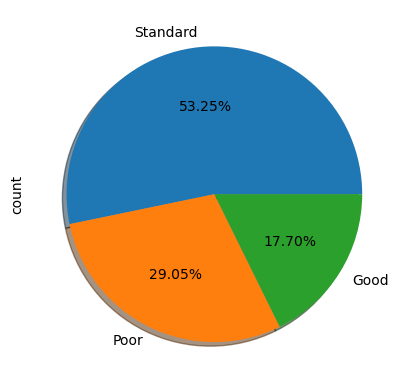

In [63]:

df["Credit_Score"].value_counts().plot.pie( autopct="%1.2f%%",shadow = True,labels = ["Standard","Poor","Good"])

In [64]:
y = y.map({'Poor':0,'Good':1,'Standard':2})

In [65]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((72264, 21), (18067, 21))

# Implemenenting Correlation plots and models

Age                        -0.073387
Occupation                  0.003697
Annual_Income              -0.093653
Num_Bank_Accounts           0.144077
Num_Credit_Card             0.213375
Interest_Rate               0.268711
Num_of_Loan                 0.219082
Type_of_Loan               -0.003545
Delay_from_due_date         0.248184
Num_of_Delayed_Payment     -0.001378
Changed_Credit_Limit       -0.035922
Num_Credit_Inquiries        0.006788
Credit_Mix                 -0.271171
Outstanding_Debt            0.264882
Credit_Utilization_Ratio   -0.022702
Credit_History_Age         -0.027953
Payment_of_Min_Amount       0.091520
Total_EMI_per_month        -0.000858
Amount_invested_monthly    -0.002884
Payment_Behaviour           0.065559
Monthly_Balance             0.004864
Name: Credit_Score, dtype: float64


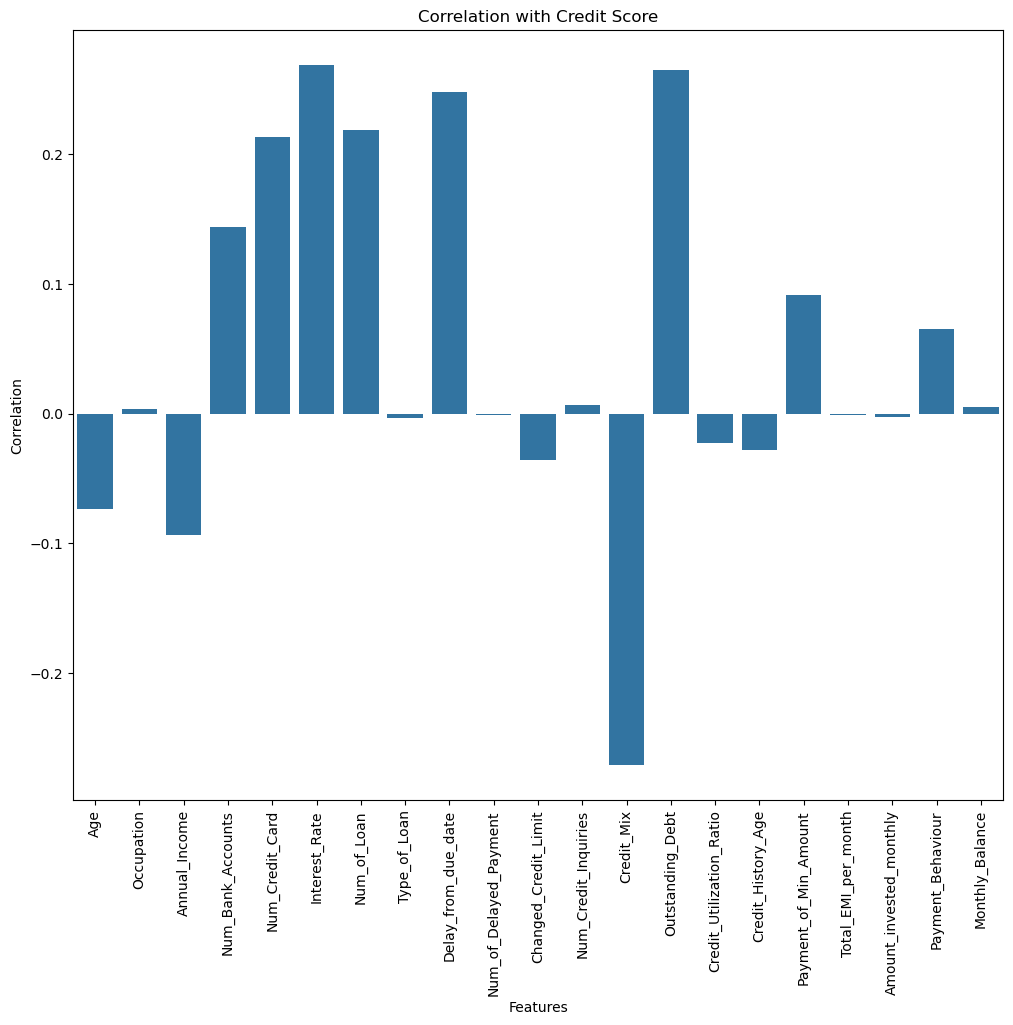

In [66]:

df["Credit_Score"]=df["Credit_Score"].map({"Standard":0,"Good":1,"Poor":2})
# Compute the correlation matrix
correlation_matrix = df.corr()

# Extract correlations of other variables with 'Credit Score'
credit_score_correlation = correlation_matrix['Credit_Score'].drop('Credit_Score')

# Display the correlations
print(credit_score_correlation)


plt.figure(figsize=(12, 10))
sns.barplot(x=credit_score_correlation.index, y=credit_score_correlation.values)
plt.title('Correlation with Credit Score')
plt.ylabel('Correlation')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.show()

Age                        -0.175603
Occupation                  0.006783
Annual_Income              -0.250441
Num_Bank_Accounts           0.559710
Num_Credit_Card             0.480336
Interest_Rate               0.588924
Num_of_Loan                 0.502619
Type_of_Loan               -0.023999
Num_of_Delayed_Payment      0.013325
Changed_Credit_Limit        0.291687
Num_Credit_Inquiries        0.010195
Credit_Mix                 -0.340028
Outstanding_Debt            0.572436
Credit_Utilization_Ratio   -0.066379
Credit_History_Age         -0.042860
Payment_of_Min_Amount       0.459014
Total_EMI_per_month        -0.004585
Amount_invested_monthly    -0.011579
Payment_Behaviour           0.078224
Monthly_Balance             0.004652
Credit_Score                0.248184
Name: Delay_from_due_date, dtype: float64


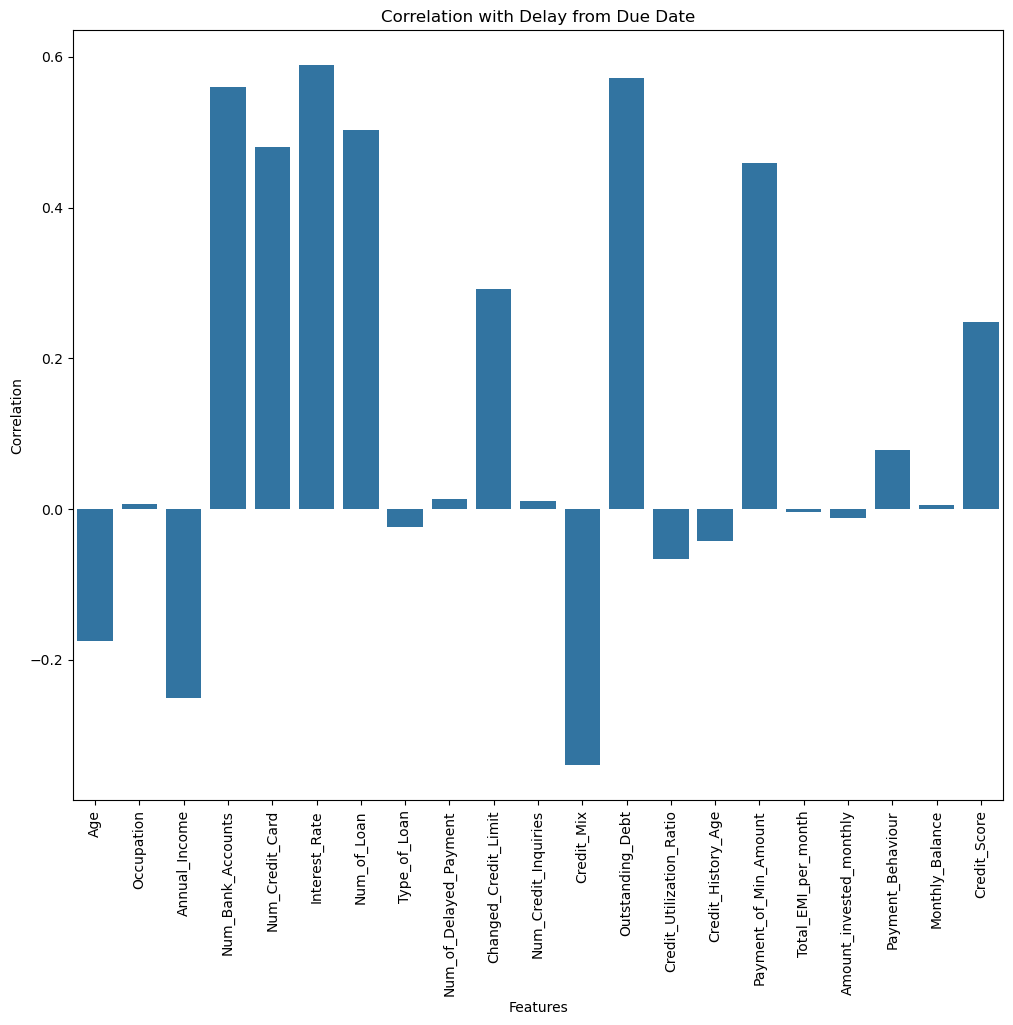

In [67]:


# Compute the correlation matrix
correlation_matrix = df.corr()

# Extract correlations of other variables with 'Delay_from_due_date'
delay_correlation = correlation_matrix['Delay_from_due_date'].drop('Delay_from_due_date')

# Display the correlations
print(delay_correlation)

# Plot the correlations
plt.figure(figsize=(12, 10))
sns.barplot(x=delay_correlation.index, y=delay_correlation.values)
plt.title('Correlation with Delay from Due Date')
plt.ylabel('Correlation')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.77      0.69      9436
           1       0.58      0.47      0.52      3261
           2       0.65      0.48      0.55      5370

    accuracy                           0.63     18067
   macro avg       0.62      0.57      0.59     18067
weighted avg       0.63      0.63      0.62     18067



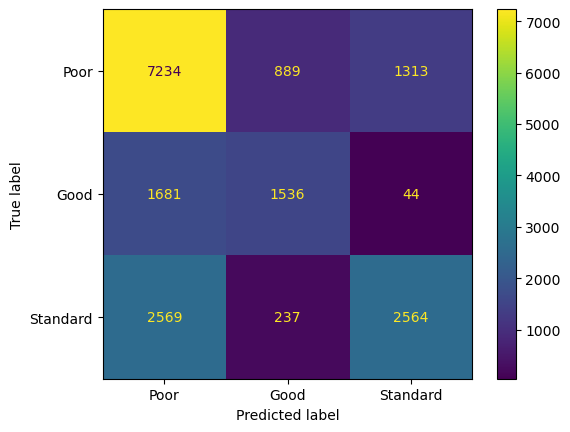

In [68]:
#Logistic Regression

# Selected relevant features based on feature selection
selected_features = [
    'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
    'Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
    'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
    'Monthly_Balance'
]

# Select features (X) and target variable (y)
X = df[selected_features]
y = df['Credit_Score']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), 
                                                  display_labels=['Poor', 'Good', 'Standard'])
confusion_matrix_display.plot()


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      9436
           1       0.65      0.64      0.65      3261
           2       0.72      0.73      0.72      5370

    accuracy                           0.72     18067
   macro avg       0.71      0.71      0.71     18067
weighted avg       0.72      0.72      0.72     18067



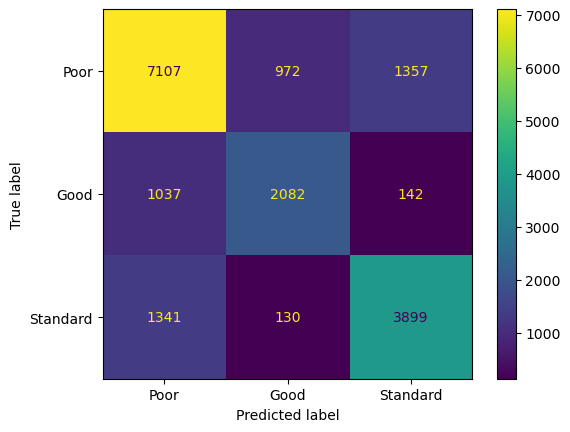

In [69]:
#DecisionTreeClassifier

# Selected relevant features based on feature selection
selected_features = [
    'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
    'Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
    'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
    'Monthly_Balance'
]

# Select features (X) and target variable (y)
X = df[selected_features]
y = df['Credit_Score']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), 
                                                  display_labels=['Poor', 'Good', 'Standard'])
confusion_matrix_display.plot()


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      9436
           1       0.74      0.71      0.73      3261
           2       0.79      0.79      0.79      5370

    accuracy                           0.78     18067
   macro avg       0.78      0.77      0.77     18067
weighted avg       0.78      0.78      0.78     18067



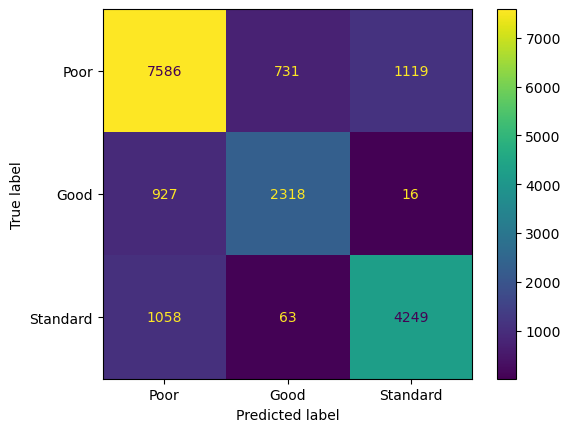

In [70]:
#Random Forest

# Selected features based on feature selection
selected_features = [
    'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
    'Delay_from_due_date',
    'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
    'Monthly_Balance'
]

# Select features (X) and target variable (y)
X = df[selected_features]
y = df['Credit_Score']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the random forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), 
                                                  display_labels=['Poor', 'Good', 'Standard'])
confusion_matrix_display.plot()


In [71]:
#Predicting Credit Score
y_pred = model.predict(x_test)

# Create a DataFrame containing the original test set and the predicted values
predicted_df = pd.DataFrame(x_test, columns=x_test.columns)  
predicted_df['Predicted_Credit_Score'] = y_pred

# Display the DataFrame
predicted_df.head()

,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Monthly_Balance,Predicted_Credit_Score
58313,-0.142971,-1.224158,-0.060989,0.189737,-0.946868,2,-0.578185,254,1,0.010276,0
63442,-2.072377,-1.224158,-1.548384,-1.035773,-0.812313,1,-1.173949,91,0,0.010276,0
78779,1.014673,-0.257115,-0.747479,-0.218766,-0.812313,1,-0.980618,199,0,0.010276,1
86030,1.014673,1.193449,1.884066,-0.627270,-0.274092,0,0.410042,47,1,0.010276,2
37290,0.242911,0.226406,0.625501,-1.444277,-0.543203,2,-0.487114,229,1,0.010276,0
